In [3]:
# pip install pycaret

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.clustering import *

In [5]:
df_Transaction = pd.read_csv("data/Sales_Mini_2013v2.csv")
df_Transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60359 entries, 0 to 60358
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Index          60359 non-null  int64 
 1   DateKey        60359 non-null  object
 2   channelKey     60359 non-null  int64 
 3   StoreKey       60359 non-null  int64 
 4   ProductKey     60359 non-null  int64 
 5   SalesQuantity  60359 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 2.8+ MB


In [6]:
df_Transaction

,Index,DateKey,channelKey,StoreKey,ProductKey,SalesQuantity
0,167454,01-Jan-13,1,119,839,9
1,167455,01-Jan-13,1,270,1311,26
2,167456,01-Jan-13,2,199,704,18
3,167457,01-Jan-13,1,33,652,9
4,167458,01-Jan-13,4,310,1163,13
...,...,...,...,...,...,...
60354,227808,31-Dec-13,4,308,318,6
60355,227809,31-Dec-13,2,306,1571,8
60356,227810,31-Dec-13,1,300,176,13
60357,227811,31-Dec-13,1,182,545,13


In [7]:
# Specify the sheet name you want to open
sheet_name = "Product"  # Replace "Sheet2" with the actual sheet name you want to open

# Read the Excel file with the specified sheet
df_Product = pd.read_excel('data/RefTable.xlsx', sheet_name=sheet_name)
df_Product.head(3)

,ProductName,ProductDescription,Manufacturer,BrandName,ClassName,UnitCost,UnitPrice,ProductKey,ProductSubcategoryKey
0,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Economy,10.69,20.96,873,22
1,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Economy,6.63,13.00,879,22
2,Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Economy,6.63,13.00,880,22


In [8]:
# Specify the sheet name you want to open
sheet_name = "ProductSubcategory"  # Replace "Sheet2" with the actual sheet name you want to open

# Read the Excel file with the specified sheet
df_ProductSubcategory = pd.read_excel('data/RefTable.xlsx', sheet_name=sheet_name)
df_ProductSubcategory.head(3)

,ProductSubcategoryKey,ProductSubcategory,ProductCategoryKey
0,42,Refrigerators,8
1,43,Microwaves,8
2,44,Water Heaters,8


In [9]:
# Specify the sheet name you want to open
sheet_name = "ProductCategory"  # Replace "Sheet2" with the actual sheet name you want to open

# Read the Excel file with the specified sheet
df_ProductCategory = pd.read_excel('data/RefTable.xlsx', sheet_name=sheet_name)
df_ProductCategory.head(3)

,ProductCategoryKey,ProductCategory
0,1,Audio
1,2,TV and Video
2,3,Computers


In [10]:
# Specify the sheet name you want to open
sheet_name = "Channel"  # Replace "Sheet2" with the actual sheet name you want to open

# Read the Excel file with the specified sheet
df_Channel = pd.read_excel('data/RefTable.xlsx', sheet_name=sheet_name)
df_Channel.head(3)

,Channel,ChannelName
0,1,Store
1,2,Online
2,3,Catalog


In [11]:
# Specify the sheet name you want to open
sheet_name = "Stores"  # Replace "Sheet2" with the actual sheet name you want to open

# Read the Excel file with the specified sheet
df_Stores = pd.read_excel('data/RefTable.xlsx', sheet_name=sheet_name)
df_Stores.head(3)

,StoreKey,GeographyKey,StoreType,StoreName,Status,CloseReason,EmployeeCount,SellingAreaSize
0,1,693,Store,Contoso Seattle No.1 Store,On,NaN,17.0,462
1,2,693,Store,Contoso Seattle No.2 Store,On,NaN,25.0,700
2,3,856,Store,Contoso Kennewick Store,On,NaN,26.0,680


In [12]:
# Specify the sheet name you want to open
sheet_name = "Geography"  # Replace "Sheet2" with the actual sheet name you want to open

# Read the Excel file with the specified sheet
df_Geography = pd.read_excel('data/RefTable.xlsx', sheet_name=sheet_name)
df_Geography.head(3)

,GeographyKey,GeographyType,ContinentName,RegionCountryName
0,424,City,North America,United States
1,430,City,North America,United States
2,431,City,North America,United States


In [13]:
# Merge the 'df_Transaction' and 'df_Product' DataFrames based on the 'ProductKey' column
df_Transaction_Product = pd.merge(df_Transaction, df_Product, on="ProductKey")

# Output the resulting merged DataFrame
df_Transaction_Product

,Index,DateKey,channelKey,StoreKey,ProductKey,SalesQuantity,ProductName,ProductDescription,Manufacturer,BrandName,ClassName,UnitCost,UnitPrice,ProductSubcategoryKey
0,167454,01-Jan-13,1,119,839,9,Contoso USB Wave Multi-Media Keyboard M901 Gold,USB wave multimedia keyboard,"Contoso, Ltd",Contoso,Regular,11.91,25.90,22
1,168313,07-Jan-13,1,48,839,9,Contoso USB Wave Multi-Media Keyboard M901 Gold,USB wave multimedia keyboard,"Contoso, Ltd",Contoso,Regular,11.91,25.90,22
2,169140,12-Jan-13,2,306,839,8,Contoso USB Wave Multi-Media Keyboard M901 Gold,USB wave multimedia keyboard,"Contoso, Ltd",Contoso,Regular,11.91,25.90,22
3,169148,12-Jan-13,1,276,839,13,Contoso USB Wave Multi-Media Keyboard M901 Gold,USB wave multimedia keyboard,"Contoso, Ltd",Contoso,Regular,11.91,25.90,22
4,171268,25-Jan-13,4,308,839,9,Contoso USB Wave Multi-Media Keyboard M901 Gold,USB wave multimedia keyboard,"Contoso, Ltd",Contoso,Regular,11.91,25.90,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60354,212740,03-Oct-13,1,4,875,10,Contoso Wireless Notebook Optical Mouse X205 W...,"Wireless notebook mouse, long battery life, co...","Contoso, Ltd",Contoso,Deluxe,43.06,129.95,22
60355,217585,01-Nov-13,1,196,875,6,Contoso Wireless Notebook Optical Mouse X205 W...,"Wireless notebook mouse, long battery life, co...","Contoso, Ltd",Contoso,Deluxe,43.06,129.95,22
60356,218898,09-Nov-13,1,97,875,6,Contoso Wireless Notebook Optical Mouse X205 W...,"Wireless notebook mouse, long battery life, co...","Contoso, Ltd",Contoso,Deluxe,43.06,129.95,22
60357,219597,13-Nov-13,1,258,875,6,Contoso Wireless Notebook Optical Mouse X205 W...,"Wireless notebook mouse, long battery life, co...","Contoso, Ltd",Contoso,Deluxe,43.06,129.95,22


In [14]:
# Calculate the revenue by multiplying the 'SalesQuantity' and 'UnitPrice' columns
df_Transaction_Product["Revenue"] = df_Transaction_Product["SalesQuantity"] * df_Transaction_Product["UnitPrice"]

# Display the first few rows of the updated DataFrame
df_Transaction_Product.head()

,Index,DateKey,channelKey,StoreKey,ProductKey,SalesQuantity,ProductName,ProductDescription,Manufacturer,BrandName,ClassName,UnitCost,UnitPrice,ProductSubcategoryKey,Revenue
0,167454,01-Jan-13,1,119,839,9,Contoso USB Wave Multi-Media Keyboard M901 Gold,USB wave multimedia keyboard,"Contoso, Ltd",Contoso,Regular,11.91,25.9,22,233.1
1,168313,07-Jan-13,1,48,839,9,Contoso USB Wave Multi-Media Keyboard M901 Gold,USB wave multimedia keyboard,"Contoso, Ltd",Contoso,Regular,11.91,25.9,22,233.1
2,169140,12-Jan-13,2,306,839,8,Contoso USB Wave Multi-Media Keyboard M901 Gold,USB wave multimedia keyboard,"Contoso, Ltd",Contoso,Regular,11.91,25.9,22,207.2
3,169148,12-Jan-13,1,276,839,13,Contoso USB Wave Multi-Media Keyboard M901 Gold,USB wave multimedia keyboard,"Contoso, Ltd",Contoso,Regular,11.91,25.9,22,336.7
4,171268,25-Jan-13,4,308,839,9,Contoso USB Wave Multi-Media Keyboard M901 Gold,USB wave multimedia keyboard,"Contoso, Ltd",Contoso,Regular,11.91,25.9,22,233.1


In [15]:
# Specify the list of column names to be dropped from the DataFrame
selected_columns = ["Index", "ProductName", "ProductDescription", "Manufacturer", "BrandName", "ClassName", "ProductSubcategoryKey"]

# Drop the selected columns from the DataFrame
df_Transaction_Product = df_Transaction_Product.drop(selected_columns, axis=1)  # axis=0 drops rows, axis=1 drops columns

# Display the first three rows of the updated DataFrame
df_Transaction_Product.head(3)

,DateKey,channelKey,StoreKey,ProductKey,SalesQuantity,UnitCost,UnitPrice,Revenue
0,01-Jan-13,1,119,839,9,11.91,25.9,233.1
1,07-Jan-13,1,48,839,9,11.91,25.9,233.1
2,12-Jan-13,2,306,839,8,11.91,25.9,207.2


In [16]:
# Group the 'df_Transaction_Product' DataFrame by 'StoreKey' and 'channelKey' columns, and calculate the sum of 'Revenue' and count of 'DateKey'
grouped_df_Transaction_Product = df_Transaction_Product.groupby(["StoreKey", "channelKey"]).agg({"Revenue":"sum", "DateKey":"count"})

# Rename the columns of the grouped DataFrame
grouped_df_Transaction_Product = grouped_df_Transaction_Product.rename(columns={"Revenue":"TotalRevenue", "DateKey":"TransactionCount"})

# Display the first three rows of the grouped DataFrame
grouped_df_Transaction_Product.head(3)

,,TotalRevenue,TransactionCount
StoreKey,channelKey,,
1,1,470281.41,120
2,1,411718.49,102
3,1,405689.80,106


In [17]:
# Perform the merge based on 'StoreKey'
df_Transaction_Product_Stores = grouped_df_Transaction_Product.reset_index().merge(df_Stores, on='StoreKey')

# Print the resulting merged DataFrame
df_Transaction_Product_Stores

,StoreKey,channelKey,TotalRevenue,TransactionCount,GeographyKey,StoreType,StoreName,Status,CloseReason,EmployeeCount,SellingAreaSize
0,1,1,470281.41,120,693,Store,Contoso Seattle No.1 Store,On,NaN,17.0,462
1,2,1,411718.49,102,693,Store,Contoso Seattle No.2 Store,On,NaN,25.0,700
2,3,1,405689.80,106,856,Store,Contoso Kennewick Store,On,NaN,26.0,680
3,4,1,379965.39,110,424,Store,Contoso Bellevue Store,On,NaN,19.0,455
4,5,1,418580.95,104,677,Store,Contoso Redmond Store,On,NaN,33.0,560
...,...,...,...,...,...,...,...,...,...,...,...
301,306,2,17988309.89,3819,586,Online,Contoso Europe Online Store,On,NaN,7.0,1000
302,307,2,21811516.99,4112,710,Online,Contoso Asia Online Store,On,NaN,8.0,93800
303,308,4,12796123.82,2739,693,Reseller,Contoso North America Reseller,On,NaN,15.0,450
304,309,4,10684940.65,2496,529,Reseller,Contoso Europe Reseller,On,NaN,12.0,551


In [18]:
selected_columns = ['GeographyKey', 'StoreName']
grouped_df_Transaction_Product_Stores = df_Transaction_Product_Stores.drop(selected_columns, axis=1)
grouped_df_Transaction_Product_Stores

,StoreKey,channelKey,TotalRevenue,TransactionCount,StoreType,Status,CloseReason,EmployeeCount,SellingAreaSize
0,1,1,470281.41,120,Store,On,NaN,17.0,462
1,2,1,411718.49,102,Store,On,NaN,25.0,700
2,3,1,405689.80,106,Store,On,NaN,26.0,680
3,4,1,379965.39,110,Store,On,NaN,19.0,455
4,5,1,418580.95,104,Store,On,NaN,33.0,560
...,...,...,...,...,...,...,...,...,...
301,306,2,17988309.89,3819,Online,On,NaN,7.0,1000
302,307,2,21811516.99,4112,Online,On,NaN,8.0,93800
303,308,4,12796123.82,2739,Reseller,On,NaN,15.0,450
304,309,4,10684940.65,2496,Reseller,On,NaN,12.0,551


In [19]:
# Perform the merge based on 'channelKey' and 'Channel'
df_Transaction_Product_Stores_Channel = grouped_df_Transaction_Product_Stores.merge(df_Channel, left_on='channelKey', right_on='Channel')

# Print the resulting merged DataFrame
df_Transaction_Product_Stores_Channel

,StoreKey,channelKey,TotalRevenue,TransactionCount,StoreType,Status,CloseReason,EmployeeCount,SellingAreaSize,Channel,ChannelName
0,1,1,470281.41,120,Store,On,NaN,17.0,462,1,Store
1,2,1,411718.49,102,Store,On,NaN,25.0,700,1,Store
2,3,1,405689.80,106,Store,On,NaN,26.0,680,1,Store
3,4,1,379965.39,110,Store,On,NaN,19.0,455,1,Store
4,5,1,418580.95,104,Store,On,NaN,33.0,560,1,Store
...,...,...,...,...,...,...,...,...,...,...,...
301,307,2,21811516.99,4112,Online,On,NaN,8.0,93800,2,Online
302,200,3,21220519.78,3834,Catalog,On,NaN,120.0,462,3,Catalog
303,308,4,12796123.82,2739,Reseller,On,NaN,15.0,450,4,Reseller
304,309,4,10684940.65,2496,Reseller,On,NaN,12.0,551,4,Reseller


In [20]:
selected_columns = ['channelKey', 'Channel']
df_final = df_Transaction_Product_Stores_Channel.drop(selected_columns, axis=1)
df_final

,StoreKey,TotalRevenue,TransactionCount,StoreType,Status,CloseReason,EmployeeCount,SellingAreaSize,ChannelName
0,1,470281.41,120,Store,On,NaN,17.0,462,Store
1,2,411718.49,102,Store,On,NaN,25.0,700,Store
2,3,405689.80,106,Store,On,NaN,26.0,680,Store
3,4,379965.39,110,Store,On,NaN,19.0,455,Store
4,5,418580.95,104,Store,On,NaN,33.0,560,Store
...,...,...,...,...,...,...,...,...,...
301,307,21811516.99,4112,Online,On,NaN,8.0,93800,Online
302,200,21220519.78,3834,Catalog,On,NaN,120.0,462,Catalog
303,308,12796123.82,2739,Reseller,On,NaN,15.0,450,Reseller
304,309,10684940.65,2496,Reseller,On,NaN,12.0,551,Reseller


In [21]:
data = df_final

s = setup(data, 
              ignore_features = ['StoreKey'],
              session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(306, 9)"
2,Transformed data shape,"(306, 14)"
3,Ignore features,1
4,Numeric features,4
5,Categorical features,4
6,Rows with missing values,96.1%
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [22]:
# functional API ตอนแรกได้ k=4 แต่พอดู elbow ได้ k=3 ดังนั้นเราต้องมาแก้เอง
# kmeans = create_model('kmeans') ตอนแรก
kmeans = create_model('kmeans', num_clusters=3)

In [23]:
print(kmeans)

KMeans(n_clusters=3, random_state=123)


In [24]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

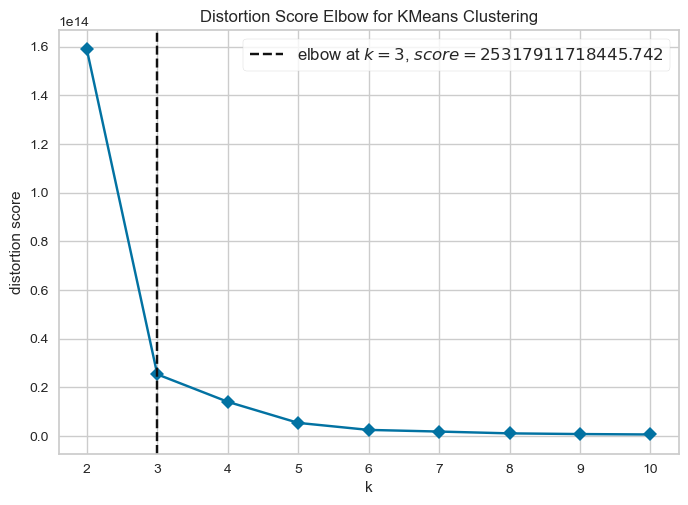

In [25]:
plot_model(kmeans, plot = 'elbow')

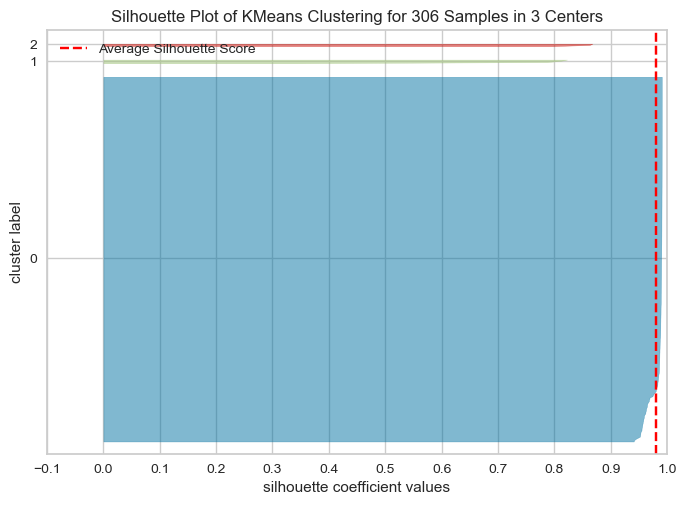

In [26]:
plot_model(kmeans, plot = 'silhouette')

In [27]:
result = assign_model(kmeans)
result.head()

,TotalRevenue,TransactionCount,StoreType,Status,CloseReason,EmployeeCount,SellingAreaSize,ChannelName,Cluster
0,470281.40625,120,Store,On,NaN,17.0,462,Store,Cluster 0
1,411718.50000,102,Store,On,NaN,25.0,700,Store,Cluster 0
2,405689.81250,106,Store,On,NaN,26.0,680,Store,Cluster 0
3,379965.37500,110,Store,On,NaN,19.0,455,Store,Cluster 0
4,418580.93750,104,Store,On,NaN,33.0,560,Store,Cluster 0


In [28]:
cluster_counts = result['Cluster'].value_counts()
cluster_counts

Cluster
Cluster 0    299
Cluster 1      4
Cluster 2      3
Name: count, dtype: int64

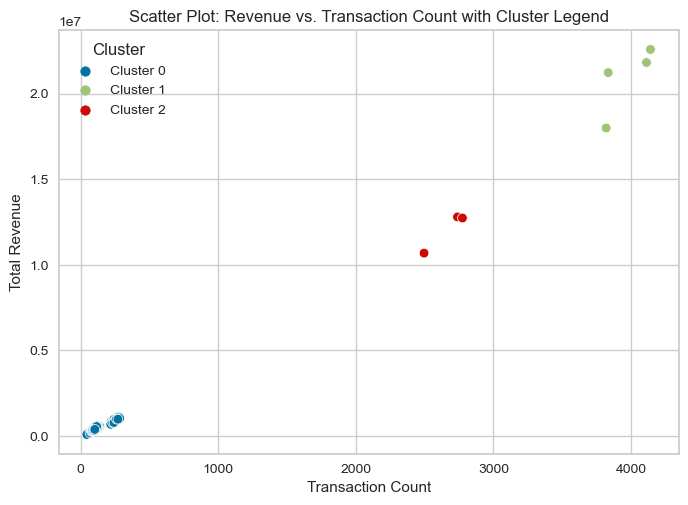

In [29]:
# Create a scatter plot with 'TransactionCount' on the x-axis, 'TotalRevenue' on the y-axis, and hue='Cluster' for the legend
sns.scatterplot(x='TransactionCount', y='TotalRevenue', hue='Cluster', data=result)

# Set labels and title
plt.xlabel('Transaction Count')
plt.ylabel('Total Revenue')
plt.title('Scatter Plot: Revenue vs. Transaction Count with Cluster Legend')

# Show the plot
plt.show()

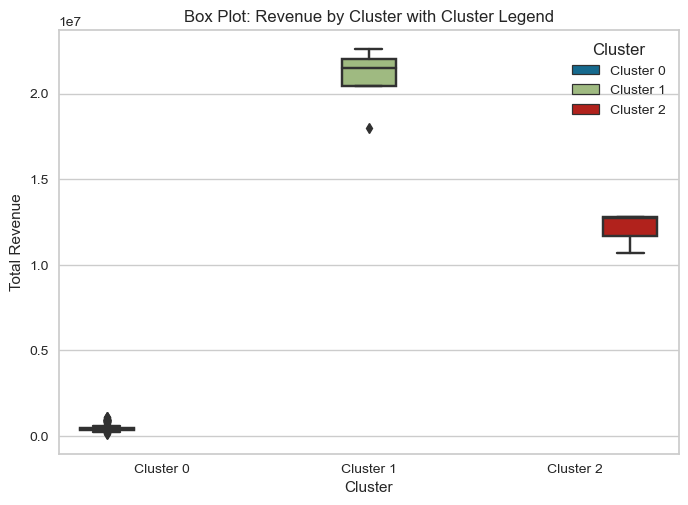

In [30]:
# Create a box plot with 'Cluster' on the x-axis and 'TotalRevenue' on the y-axis, hue='Cluster' for the legend
sns.boxplot(x='Cluster', y='TotalRevenue', hue='Cluster', data=result)

# Set labels and title
plt.xlabel('Cluster')
plt.ylabel('Total Revenue')
plt.title('Box Plot: Revenue by Cluster with Cluster Legend')

# Show the plot
plt.show()

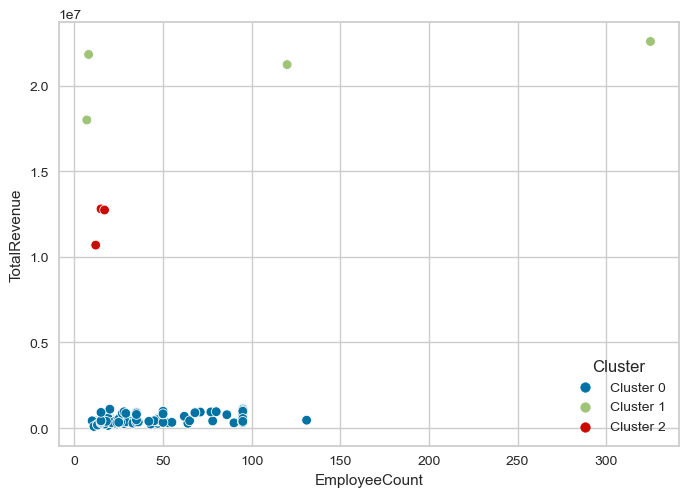

In [31]:
# Create a scatter plot with 'TransactionCount' on the x-axis, 'TotalRevenue' on the y-axis, and hue='Cluster' for the legend
sns.scatterplot(x='EmployeeCount', y='TotalRevenue', hue='Cluster', data=result)

# Set labels and title
plt.xlabel('EmployeeCount')
plt.ylabel('TotalRevenue')

# Show the plot
plt.show()

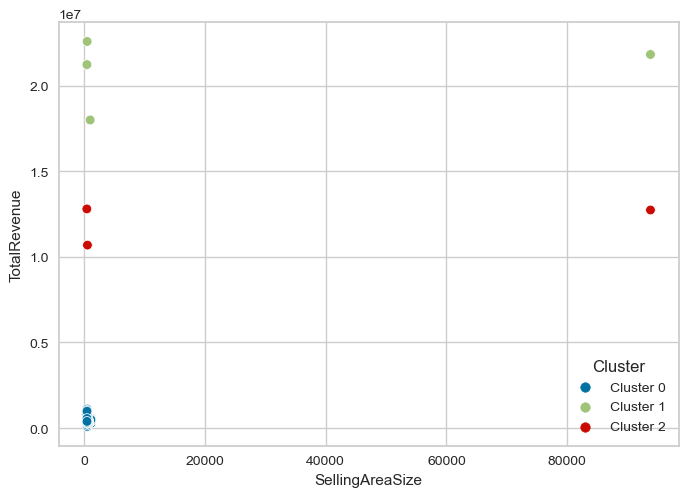

In [32]:
# Create a scatter plot with 'TransactionCount' on the x-axis, 'TotalRevenue' on the y-axis, and hue='Cluster' for the legend
sns.scatterplot(x='SellingAreaSize', y='TotalRevenue', hue='Cluster', data=result)

# Set labels and title
plt.xlabel('SellingAreaSize')
plt.ylabel('TotalRevenue')

# Show the plot
plt.show()

In [33]:
# Create a box plot using Plotly
fig = px.box(result, x='StoreType', y='TotalRevenue', color='Cluster')

# Set labels and title
fig.update_layout(
    xaxis_title='Store Type',
    yaxis_title='Total Revenue',
    title='Box Plot: Total Revenue by Store Type with Cluster Legend'
)

# Show the plot
fig.show()

NameError: name 'px' is not defined

In [ ]:
cluster_status_count = result.groupby('Cluster')['Status'].count()
cluster_status_count

Cluster
Cluster 0    299
Cluster 1      3
Cluster 2      3
Cluster 3      1
Name: Status, dtype: int64

In [ ]:
# Add the 'StoreKey' column from rfm_df to result
result = result.merge(df_final[['StoreKey']], left_index=True, right_index=True)

# Print the updated result DataFrame
result.head()

,TotalRevenue,TransactionCount,StoreType,Status,CloseReason,EmployeeCount,SellingAreaSize,ChannelName,Cluster,StoreKey
0,470281.40625,120,Store,On,NaN,17.0,462,Store,Cluster 0,1
1,411718.50000,102,Store,On,NaN,25.0,700,Store,Cluster 0,2
2,405689.81250,106,Store,On,NaN,26.0,680,Store,Cluster 0,3
3,379965.37500,110,Store,On,NaN,19.0,455,Store,Cluster 0,4
4,418580.93750,104,Store,On,NaN,33.0,560,Store,Cluster 0,5


In [ ]:
# Create the pivot table
pivot_table = pd.pivot_table(result, values='StoreKey', index='Cluster', columns='Status', aggfunc='count')

# Display the pivot table
print(pivot_table)

Status     Off   On
Cluster            
Cluster 0   12  287
Cluster 1    0    3
Cluster 2    0    3
Cluster 3    0    1


In [ ]:
# Filter the DataFrame based on the condition
filtered_result = result[result['Status'] == 'Off']

# Display the filtered DataFrame
filtered_result

,TotalRevenue,TransactionCount,StoreType,Status,CloseReason,EmployeeCount,SellingAreaSize,ChannelName,Cluster,StoreKey
11,420364.87500,119,Store,Off,Relocation,19.0,455,Store,Cluster 0,12
18,432517.93750,102,Store,Off,Store,19.0,455,Store,Cluster 0,19
28,401410.87500,109,Store,Off,Relocation,47.0,1125,Store,Cluster 0,29
47,469259.03125,118,Store,Off,Relocation,25.0,700,Store,Cluster 0,48
60,477404.90625,115,Store,Off,Relocation,17.0,462,Store,Cluster 0,62
82,415094.84375,114,Store,Off,Relocation,22.0,500,Store,Cluster 0,84
109,426941.09375,107,Store,Off,Relocation,19.0,455,Store,Cluster 0,112
116,347652.56250,99,Store,Off,Store,19.0,455,Store,Cluster 0,119
126,408485.25000,102,Store,Off,Relocation,47.0,1125,Store,Cluster 0,129
145,400269.87500,102,Store,Off,Relocation,25.0,700,Store,Cluster 0,148
